# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

In [1]:
#import necessary packages

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [4]:
# number of callbacks for white-sounding names
sum(data[data.race=='w'].call)

235.0

In [5]:
# number of callbacks for black-sounding names
sum(data[data.race=='b'].call)

157.0

In [6]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


<div class="span5 alert alert-success">
<p>Your answers to Q1 and Q2 here</p>
</div>

#1. What test is appropriate for this problem? Does CLT apply?

A z-test would be appropriate for this problem. 
Yes, Central limit theorem applies to this data sample. 
The sample size is large.

#2. What are the null and alternate hypotheses?

H0: Race doesnot have a significant impact. P(w call) - P(b call)=0

Ha: Race have a significant impact. P(w call) -  P(b call) != 0

In [7]:
w = data[data.race=='w']
b = data[data.race=='b']

#3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and frequentist approaches.

In [8]:
# Your solution to Q3 here

Test of proportion difference.

H0: p(w.call) - p(b.call) = 0
    
Ha: p(w.call) - P(w.call) !=0
    
Level of significance = 0.05

In [9]:
#calculate the sample mean of white
# change
sample_p_w = np.mean(w.call)
#calculate the sample mean of black
sample_p_b = np.mean(b.call)
#calculate the difference of two sample mean
diff_p = sample_p_w - sample_p_b
# n_w sample size of white and n_b sample size of black
n_w = len(w.call)
n_b = len(b.call)
#calculate the variance of white and black sample calls
variance_w = np.var(w.call)
variance_b = np.var(b.call)
#Calculate the t-value using the formula
t= diff_p / np.sqrt((variance_w/n_w)+(variance_b/n_b))
t

4.115583524916792

In [10]:
deg_freedom = n_w + n_b - 2
#calculation p-value for 2-tailed test. 
stats.t.sf(t, deg_freedom)*2

3.9258777922000494e-05

In [11]:
deg_freedom

4868

Because P-value  is less than 0.05, we will reject the null hypothesis.


In [12]:
# We assume equal population variance
standard_error = np.sqrt(((n_w-1)*variance_w + (n_b-1)*variance_b) / (n_w+n_b-2))*(np.sqrt((1/n_w)+(1/n_b)))
#from the t-table, critical value t-score is 1.96
margin_of_error = 1.96* standard_error
margin_of_error

0.015255284004274486

In [16]:
#Calculate the confidence interval for 95%
conf_int = [diff_p - margin_of_error, diff_p + margin_of_error]
conf_int

[0.016777570850786093, 0.04728813885933506]

In [17]:
# Now, use the bootstrap method
#Bootstrap replicate function to resample data and find mean/std
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

#draw many bootstrap replicates 
def draw_bs_reps(data, func, size=1):
    return np.array([bootstrap_replicate_1d(data, func) for _ in range(size)])

np.random.seed(1)
mean_diff = np.mean(w.call) - np.mean(b.call)
#get bootstrap replicates of data sets
bs_replicates_w = draw_bs_reps(w.call, np.mean, size=10000)
bs_replicates_b = draw_bs_reps(b.call, np.mean, size=10000)
#compute replicates of difference of means: bs_diff_replicates
bs_diff_replicates = bs_replicates_w - bs_replicates_b
conf_interval = np.percentile(bs_diff_replicates, [2.5, 97.5])
conf_interval

array([0.01683778, 0.04722793])

In [18]:
# To find the p-value
combined_mean = np.mean(data.call)
#shift the samples
w_shifted = w.call - np.mean(w.call) + combined_mean
b_shifted = b.call - np.mean(b.call) + combined_mean
#get bootstrap replicates of shifted data sets
bs_replicates_w = draw_bs_reps(w_shifted, np.mean, size=10000)
bs_replicates_b = draw_bs_reps(b_shifted, np.mean, size=10000)
#compute replicates of difference of means:
bs_diff_replicates = bs_replicates_w - bs_replicates_b
#compute the p-value
p = np.sum(bs_diff_replicates >= mean_diff) / len(bs_diff_replicates)
p

0.0

#4. Write a story describing the statistical significance in the context or the original problem.

<div class="span5 alert alert-success">
<p> Your answers to Q4 and Q5 here </p>
</div>

According to the data collected, and performing inferential statistics, we reject the null hypothesis that the race does not have a significant impact on receiving a call from a employer. The p-value calculated is less than the level of significance, so we support that the race plays a significant role in receiving a call.

#5. Does your analysis mean that race/name is the most important factor in callback success? why or why not? if not, how would you amend your analysis?

In [19]:
data.columns

Index(['id', 'ad', 'education', 'ofjobs', 'yearsexp', 'honors', 'volunteer',
       'military', 'empholes', 'occupspecific', 'occupbroad', 'workinschool',
       'email', 'computerskills', 'specialskills', 'firstname', 'sex', 'race',
       'h', 'l', 'call', 'city', 'kind', 'adid', 'fracblack', 'fracwhite',
       'lmedhhinc', 'fracdropout', 'fraccolp', 'linc', 'col', 'expminreq',
       'schoolreq', 'eoe', 'parent_sales', 'parent_emp', 'branch_sales',
       'branch_emp', 'fed', 'fracblack_empzip', 'fracwhite_empzip',
       'lmedhhinc_empzip', 'fracdropout_empzip', 'fraccolp_empzip',
       'linc_empzip', 'manager', 'supervisor', 'secretary', 'offsupport',
       'salesrep', 'retailsales', 'req', 'expreq', 'comreq', 'educreq',
       'compreq', 'orgreq', 'manuf', 'transcom', 'bankreal', 'trade',
       'busservice', 'othservice', 'missind', 'ownership'],
      dtype='object')

The analysis does not mean that race/name is the most important factor in callback success. There are many other factors which affects the callback success, such as education, experience, sex, etc. Race/name is one factor in callback success and according to the inferential statistics, it has been successfully tested. We have to analyze other factors to find out which is the most important.

In [20]:
# calculate the total number of successful call
total_calls = np.sum(data['call']==1)
# group the data by race: white and black call back rate
group_race = data.groupby('race')['call'].sum()*100/total_calls
group_race

race
b    40.051022
w    59.948978
Name: call, dtype: float32

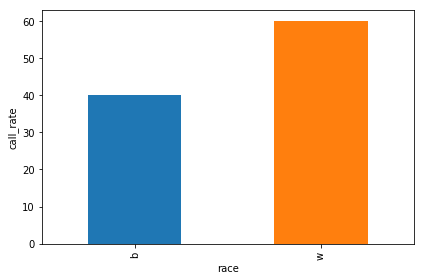

In [21]:
# plot a bar plot to see the proportion of the call
group_race.plot(kind='bar')
plt.ylabel('call_rate')
plt.tight_layout()

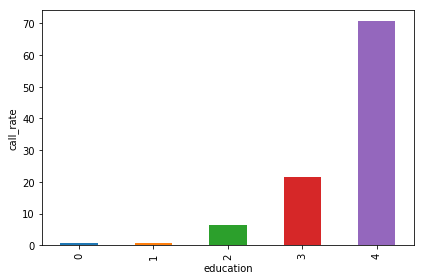

In [22]:
# group the data by education
group_education = data.groupby('education')['call'].sum()*100/total_calls
# plot a bar plot to see the proportion of the call
group_education.plot(kind='bar')
plt.ylabel('call_rate')
plt.tight_layout()

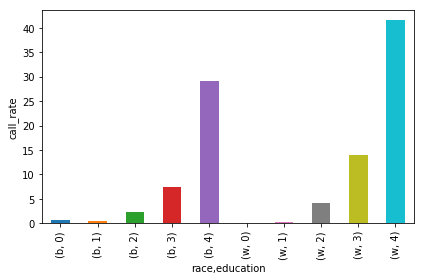

In [23]:
# now, group by race and education
group_race_education = data.groupby(['race', 'education'])['call'].sum()*100/total_calls
# plot a bar plot to see the proportion of the call
group_race_education.plot(kind='bar')
plt.ylabel('call_rate')
plt.tight_layout()

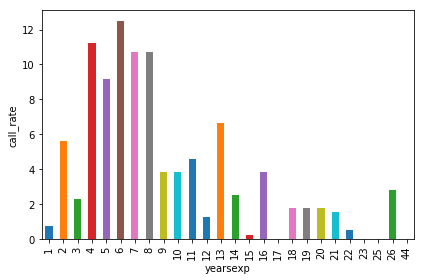

In [24]:
# now group by years of experience
group_experience = data.groupby('yearsexp')['call'].sum()*100/total_calls
# plot a bar plot to see the proportion of the call
group_experience.plot(kind='bar')
plt.ylabel('call_rate')
plt.tight_layout()

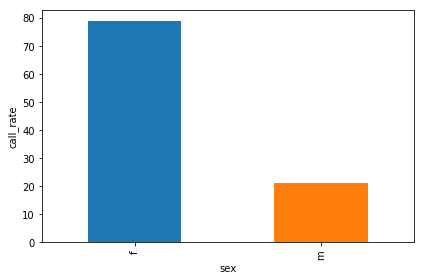

In [25]:
# group by sex
group_sex = data.groupby('sex')['call'].sum()*100/total_calls
# plot a bar plot to see the proportion of the call
group_sex.plot(kind='bar')
plt.ylabel('call_rate')
plt.tight_layout()